# Lab 3
### Averaging Filters

http://scikit-image.org/docs/0.13.x/api/skimage.util.html#skimage.util.random_noise

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [1]:
from skimage.filters import sobel_h, sobel, sobel_v, roberts, prewitt
from skimage.color import rgb2gray, rgb2hsv
from skimage.feature import canny
from skimage.filters import median
from matplotlib.pyplot import bar
from skimage.exposure import histogram
import math
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from scipy import fftpack
from scipy.signal import convolve2d
from skimage.util import random_noise
from skimage.exposure import rescale_intensity
from skimage.filters import median, gaussian

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:

def show_images(images, titles=None):
    # This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None:
        titles = ['(%d)' % i for i in range(1, n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image, title in zip(images, titles):
        a = fig.add_subplot(1, n_ims, n)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()


def showHist(img):
    # An "interface" to matplotlib.axes.Axes.hist() method
    plt.figure()
    imgHist = histogram(img, nbins=256)

    bar(imgHist[1].astype(np.uint8), imgHist[0], width=0.8, align='center')


In [3]:
img = io.imread("./imgs/tire.tif").astype(np.uint8)
noisy_img = random_noise(img, mode="s&p", salt_vs_pepper=0.5)

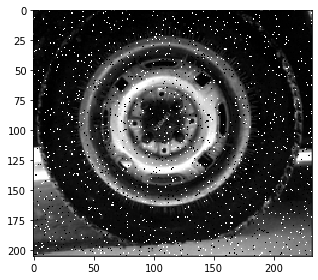

In [4]:
io.imshow(noisy_img)

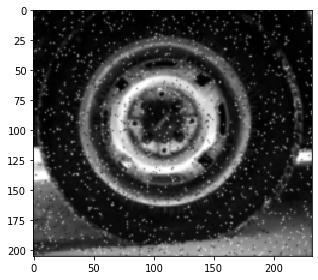

In [5]:
'''
(1) Averaging Filter
'''
io.imshow(gaussian(noisy_img,sigma=0.7))

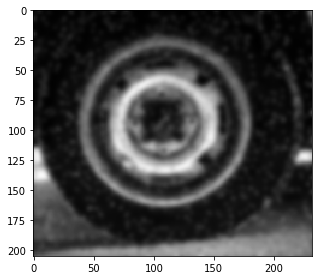

In [6]:
io.imshow(gaussian(noisy_img,sigma=2))

In [7]:
'''
(2) Median Filter
'''
def median_algorithm(img, windowWidth=3, windowHeight=3):
    new_img = np.zeros(img.shape)
    edgeX = math.floor(windowWidth/2)
    edgeY = math.floor(windowHeight/2)
    for x in range(edgeX, img.shape[0]-edgeX):
        for y in range(edgeY, img.shape[1]-edgeY):
            color = np.zeros((windowWidth, windowWidth))
            for fx in range(windowWidth):
                for fy in range(windowHeight):
                    # (x,y) are the coordinates of the pixel we are updating in the image matrix
                    # (x-edgex,y-edgey) are the coordinates (in the image matrix) of the top left pixel of the window (filter) on placing its center on pixel (x,y)
                    # As edgex = windowWidth / 2 and edgey = windowHeight / 2
                    # (fx,fy) are just the iterators to cover the whole window (filter)
                    color[fx][fy] = img[x+fx-edgeX][y+fy-edgeY]
            color = np.sort(color.flatten())
            color.shape = (windowWidth, windowHeight)
            new_img[x][y] = color[math.floor(
                windowWidth/2)][math.floor(windowHeight/2)]
    return new_img


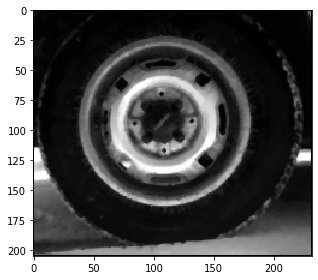

In [8]:
io.imshow(median_algorithm(noisy_img))

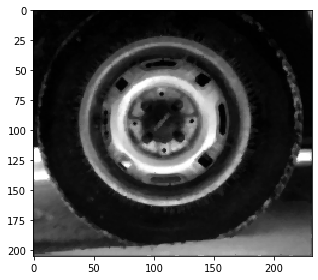

In [9]:
io.imshow(median(noisy_img))